## Machine Learning Models:

   Unnamed: 0  Time Serie AUSTRALIA - AUSTRALIAN DOLLAR/US$ BRAZIL - REAL/US$  \
0           0  2006-01-02                                ND                ND   
1           1  2006-01-03                            1.3552            2.3362   
2           2  2006-01-04                            1.3396             2.302   
3           3  2006-01-05                            1.3365             2.281   
4           4  2006-01-06                            1.3284            2.2875   

  CANADA - CANADIAN DOLLAR/US$ CHINA - RENMINBI/US$  \
0                           ND                   ND   
1                       1.1571                8.069   
2                       1.1515               8.0702   
3                       1.1619               8.0678   
4                        1.165               8.0663   

  DENMARK - DANISH KRONE/US$ EURO AREA - EURO/US$  \
0                         ND                   ND   
1                      6.231               0.8348   
2                     6

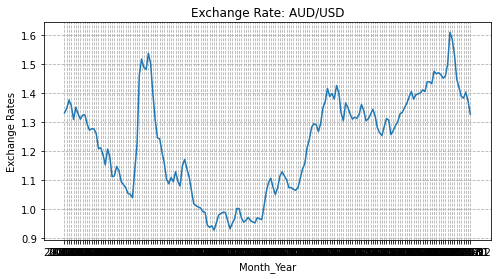

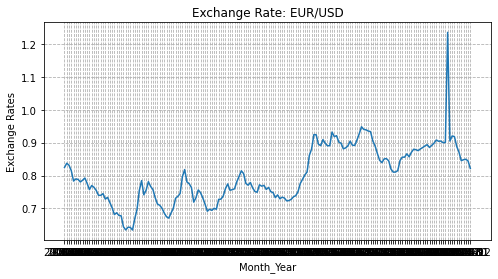

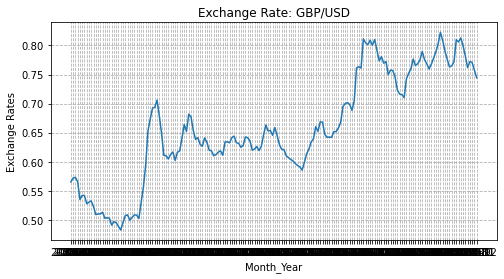

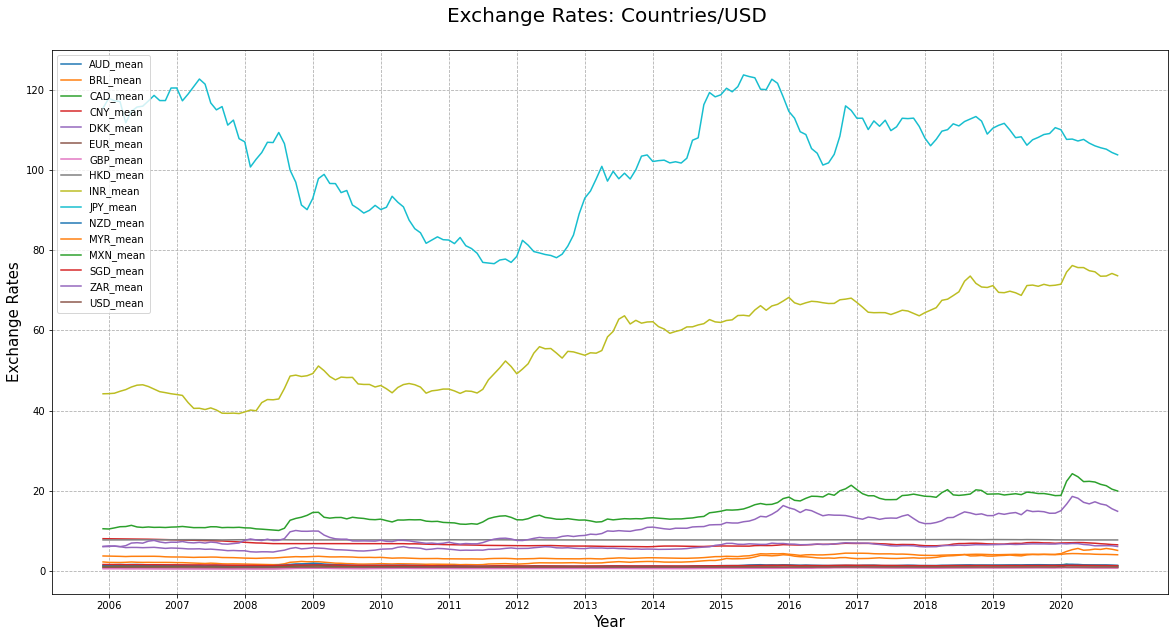

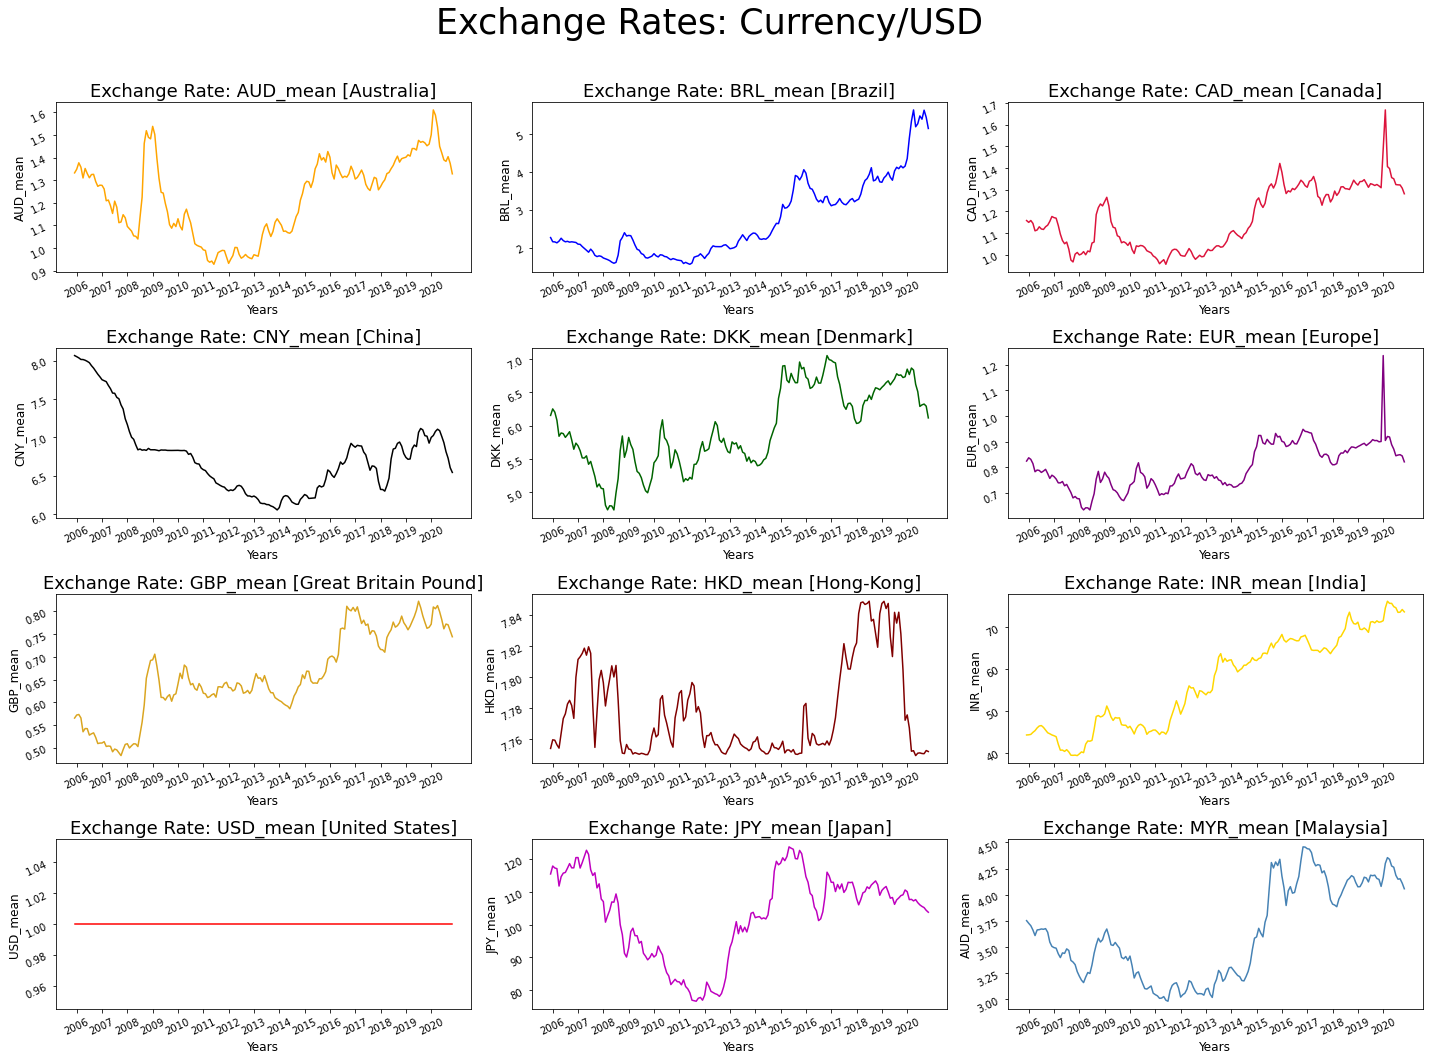

In [1]:
%run Explanatory-Data-Analysis-and-Data-Visualization.ipynb

### Linear Regression

In [2]:
# Importing the Interest Rate Differential
ir_df = pd.read_csv('IR_EURUSD.csv')
ir_df.head()

,Date,Long Carry,Short Carry
0,1/1/2016,-0.79%,-0.10%
1,2/1/2016,-0.83%,-0.10%
2,3/1/2016,-0.85%,-0.13%
3,4/1/2016,-0.95%,0.06%
4,5/1/2016,-0.97%,0.05%


In [3]:
# converting the date to 'YYYY-MM-DD' format
ir_df['Date'] = pd.to_datetime(ir_df['Date'])
ir_df.head()

,Date,Long Carry,Short Carry
0,2016-01-01,-0.79%,-0.10%
1,2016-02-01,-0.83%,-0.10%
2,2016-03-01,-0.85%,-0.13%
3,2016-04-01,-0.95%,0.06%
4,2016-05-01,-0.97%,0.05%


In [4]:
# using Long Carry to tranasform the data for the analysis
# removing the percentage from the numbers and then converting them to float
# and reshaping 1D to 2D array
x_ir = ir_df['Long Carry'].astype(str)
x_ir = x_ir.replace({'%':''}, regex = True)
x_ir = x_ir.astype('float')
x_ir = x_ir[~np.isnan(x_ir)]
x_ir = np.array(x_ir).reshape(-1,1)
x_ir

array([[-0.79],
       [-0.83],
       [-0.85],
       [-0.95],
       [-0.97],
       [-1.07],
       [-1.32],
       [-1.26],
       [-1.34],
       [-1.36],
       [-1.39],
       [-1.36],
       [-1.78],
       [-1.67],
       [-1.69],
       [-1.98],
       [-1.94],
       [-1.92],
       [-1.93],
       [-1.99],
       [-1.99],
       [-2.11],
       [-2.05],
       [-2.22],
       [-2.34],
       [-2.44],
       [-2.58],
       [-2.58],
       [-2.76],
       [-2.92],
       [-3.03],
       [-3.15],
       [-3.17],
       [-3.48],
       [-3.45],
       [-3.5 ],
       [-3.55],
       [-3.53],
       [-3.9 ],
       [-3.94],
       [-3.94],
       [-4.06],
       [-4.01],
       [-3.99],
       [-4.03],
       [-4.02],
       [-3.96],
       [-3.63],
       [-3.59],
       [-3.43],
       [-3.44],
       [-2.83],
       [-2.24],
       [-1.89],
       [-1.81],
       [-1.76],
       [-1.74],
       [-1.7 ],
       [-1.68],
       [-1.64]])

In [5]:
print("Shape of Interest Long Cary trade:", x_ir.shape)

Shape of Interest Long Cary trade: (60, 1)


In [6]:
# filtering the above years i.e from 2016-2020 from the original dataset
eur_usd_fx = df_groupby_eur[(df_groupby_eur['month_year'] >= '2016-01') & (df_groupby_eur['month_year'] <= '2020-12')].reset_index(drop=True)
eur_usd = eur_usd_fx['EUR_USD']
y_fx = eur_usd
print("Shape of European Union Region exchange rate:", y_fx.shape)
y_fx.head()

Shape of European Union Region exchange rate: (60,)


0    0.921253
1    0.901660
2    0.898335
3    0.881405
4    0.884124
Name: EUR_USD, dtype: float64

In [7]:
eur_usd_fx

,month_year,EUR_USD
0,2016-01,0.921253
1,2016-02,0.901660
2,2016-03,0.898335
3,2016-04,0.881405
4,2016-05,0.884124
5,2016-06,0.890418
6,2016-07,0.904595
7,2016-08,0.892383
8,2016-09,0.891443
9,2016-10,0.907995


In [8]:
# Extractinng the dataframe to excel file
file_name = 'EURFX_20162020.xlsx'
  
# saving the excel
eur_usd_fx.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


In [9]:
# Linear Regression with 1 independent variable (interest rate)
# Year: 2016 - 2020

#x_ir = Inerest Rate
#y_fx = Exchange Rate

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(x_ir, y_fx, test_size=0.2, random_state=1)

model = LinearRegression()

#training the model with the training datset and predicting with x_test
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
print(y_predict)

print()

# Accuracy of the training and testing dataset
print('R-squared of training data is: ', model.score(x_train, y_train))
print('R-squared of testing data is: ', model.score(x_test, y_test))

[0.8977839  0.89840951 0.88167424 0.89595918 0.89517716 0.89825311
 0.89538569 0.89548996 0.8977839  0.89069356 0.88944233 0.88709626]

R-squared of training data is:  0.00660805409254317
R-squared of testing data is:  -0.16022823578204148


In [10]:
# Linear Regression model without splitting the dataset
model = LinearRegression()
model.fit(x_ir, y_fx)

# predicting the exchange rate(y) with the help of interest rate(x)
y_fx_predict = model.predict(x_ir)
print(y_fx_predict)

print()

# Accuracy
print('R-squared of the entire dataset is: ',model.score(x_ir, y_fx))

[0.88072973 0.88088567 0.88096364 0.88135349 0.88143146 0.88182131
 0.88279593 0.88256202 0.8828739  0.88295187 0.88306882 0.88295187
 0.88458924 0.8841604  0.88423837 0.88536894 0.885213   0.88513503
 0.88517401 0.88540792 0.88540792 0.88587574 0.88564183 0.88630457
 0.88677239 0.88716224 0.88770803 0.88770803 0.88840976 0.88903352
 0.88946235 0.88993017 0.89000814 0.89121667 0.89109972 0.89129464
 0.89148957 0.8914116  0.89285404 0.89300998 0.89300998 0.8934778
 0.89328288 0.89320491 0.89336085 0.89332186 0.89308795 0.89180145
 0.89164551 0.89102175 0.89106073 0.88868265 0.88638254 0.88501807
 0.88470619 0.88451127 0.8844333  0.88427736 0.88419939 0.88404345]

R-squared of the entire dataset is:  0.004952160923659132


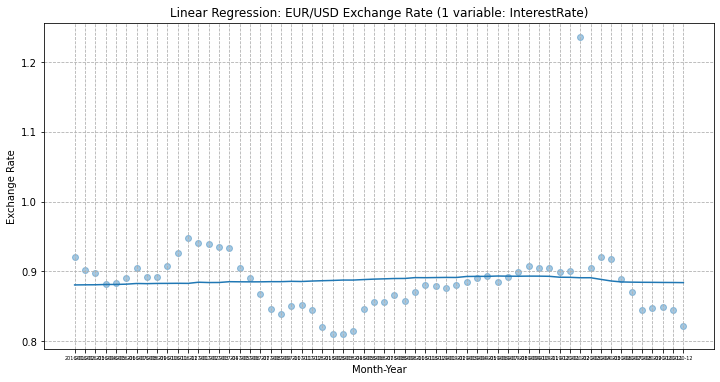

In [11]:
# Visualizing the Linear Regression of Exchange rate and interest rate
month_year = eur_usd_fx['month_year'].astype(str)

plt.figure(figsize=(12,6))
plt.scatter(month_year, y_fx, alpha=0.4)
plt.plot(month_year, y_fx_predict)
plt.title("Linear Regression: EUR/USD Exchange Rate (1 variable: InterestRate)")
plt.xlabel("Month-Year")
plt.ylabel("Exchange Rate")
plt.xticks(fontsize=5)
plt.grid(ls="--")
plt.show()

### Multiple Linear Regression

In [12]:
# Importing India and USA Interest Rates
eur_gdp = pd.read_csv("EURGDP_Ratio.csv")
usa_gdp = pd.read_csv("USAGDP_Ratio.csv")

print(eur_gdp.head())
print(usa_gdp.head())

print("Shape of GDP(European Union Region):", eur_gdp.shape)
print("Shape of GDP(USA):", usa_gdp.shape)

eur_gdp['month_year'] = pd.to_datetime(eur_gdp['DATE']).dt.to_period('M')
eur_gdp = eur_gdp.drop('DATE', axis=1)
eur_gdp = eur_gdp[['month_year', 'EUR_GDP']]

usa_gdp['month_year'] = pd.to_datetime(usa_gdp['Date']).dt.to_period('M')
usa_gdp = usa_gdp.drop('Date', axis=1)
usa_gdp = usa_gdp[['month_year', 'USA_GDP']]

# eur_gdp = eur_gdp.rename(columns={'GDP': 'EUR_GDP'})
eur_usa_gdp = pd.merge(eur_gdp, usa_gdp, on="month_year", how="inner")
# eur_usa_gdp = eur_usa_gdp.rename(columns={'GDP': 'USA_GDP'})
eur_usa_gdp['GDP_diff'] = eur_usa_gdp['EUR_GDP'] - eur_usa_gdp['USA_GDP']

eur_usa_gdp_20162020 = eur_usa_gdp[(eur_usa_gdp['month_year'] >= '2016-01') & (eur_usa_gdp['month_year'] <='2020-12')].reset_index(drop=True)
gdp_diff = ["%.4f" %num for num in eur_usa_gdp_20162020['GDP_diff']]
print(gdp_diff)
print(eur_usa_gdp.shape)
eur_usa_gdp.tail()

         DATE    EUR_GDP
0  2016-01-01  99.845022
1  2016-02-01  99.837414
2  2016-03-01  99.820110
3  2016-04-01  99.797740
4  2016-05-01  99.777681
         Date    USA_GDP
0  2016-01-01  99.956760
1  2016-02-01  99.909095
2  2016-03-01  99.863858
3  2016-04-01  99.822069
4  2016-05-01  99.787155
Shape of GDP(European Union Region): (60, 2)
Shape of GDP(USA): (60, 2)
['-0.1117', '-0.0717', '-0.0437', '-0.0243', '-0.0095', '0.0060', '0.0296', '0.0691', '0.1293', '0.2098', '0.3068', '0.4155', '0.5298', '0.6433', '0.7509', '0.8473', '0.9277', '0.9877', '1.0255', '1.0392', '1.0257', '0.9814', '0.9037', '0.7937', '0.6625', '0.5244', '0.3926', '0.2752', '0.1782', '0.1078', '0.0714', '0.0749', '0.1182', '0.1881', '0.2649', '0.3285', '0.3628', '0.3560', '0.3040', '0.2146', '0.1003', '-0.0281', '-0.1646', '-0.3060', '-0.4496', '-0.5899', '-0.7180', '-0.8208', '-0.8812', '-0.8786', '-6.5395', '-5.6113', '-5.1603', '-3.8392', '-2.5283', '-1.2617', '-1.7177', '-2.1989', '-2.6574', '-3.2800']
(60

,month_year,EUR_GDP,USA_GDP,GDP_diff
55,2020-08,95.303315,96.565043,-1.261728
56,2020-09,95.149404,96.867063,-1.717659
57,2020-10,95.005875,97.204771,-2.198896
58,2020-11,94.881191,97.538547,-2.657356
59,2020-12,94.672526,97.952541,-3.280015


In [13]:
# Extractinng the dataframe to excel file
file_name = 'EURGDP_Diff.xlsx'
  
# saving the excel
df.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


In [14]:
x_ir_gdp = np.array(list(zip(x_ir, gdp_diff)))
x_ir_gdp = x_ir_gdp.astype(np.float)

model.fit(x_ir_gdp, y_fx)
y_fx_predict_2 = model.predict(x_ir_gdp)
print(y_fx_predict_2)
print()

print("R-squared after adding GDP growth rate:", model.score(x_ir_gdp, y_fx))

[0.88031675 0.880352   0.88034732 0.88066013 0.88069225 0.88101594
 0.88186739 0.88153713 0.88166282 0.88151177 0.88135141 0.8809383
 0.88216062 0.8814406  0.88121401 0.88200926 0.88163835 0.8813977
 0.88132901 0.88151095 0.88154859 0.88211237 0.88210885 0.88303925
 0.8838453  0.8845972  0.88547831 0.8858056  0.88673645 0.88751975
 0.88802482 0.88845534 0.888408   0.88935052 0.88902634 0.88903248
 0.8891203  0.88906588 0.89056837 0.89096437 0.89128303 0.89208127
 0.89227837 0.8925992  0.8931463  0.89350075 0.89363774 0.89271357
 0.8927352  0.89214091 0.90795958 0.90313377 0.89971173 0.89474451
 0.89079634 0.88708175 0.88827965 0.88947442 0.89067929 0.89226827]

R-squared after adding GDP growth rate: 0.011261845515275315


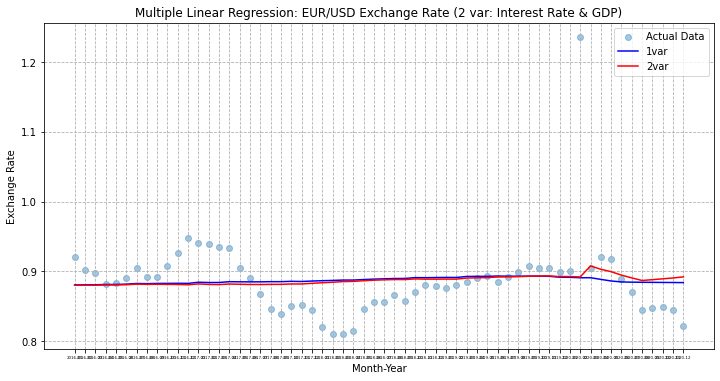

In [15]:
plt.figure(figsize=(12,6))
plt.scatter(month_year, y_fx, alpha=0.4)
plt.plot(month_year, y_fx_predict, color='b')
plt.plot(month_year, y_fx_predict_2, color='r')
plt.legend(["Actual Data", '1var', '2var'])
plt.title("Multiple Linear Regression: EUR/USD Exchange Rate (2 var: Interest Rate & GDP)")
plt.xlabel("Month-Year")
plt.ylabel("Exchange Rate")
plt.xticks(fontsize=4)
plt.grid(ls="--")
plt.show()

In [16]:
#2.3. Variables: Interest Rates & GDP & UER 
unemployment_rate = pd.read_csv("eur usa unemployment-rate.csv")
unemployment_rate.head()

,Date,eur_unemployment rate,usa_unemployment rate
0,1/1/2016,9.7,4.8
1,2/1/2016,9.6,4.9
2,3/1/2016,9.5,5.0
3,4/1/2016,9.5,5.1
4,5/1/2016,9.4,4.8


In [17]:
unemployment_rate['Date'] = pd.to_datetime(unemployment_rate['Date'])
unemployment_rate.head()

,Date,eur_unemployment rate,usa_unemployment rate
0,2016-01-01,9.7,4.8
1,2016-02-01,9.6,4.9
2,2016-03-01,9.5,5.0
3,2016-04-01,9.5,5.1
4,2016-05-01,9.4,4.8


In [18]:
# Extractinng the dataframe to excel file
file_name = 'EUR_UER.xlsx'
  
# saving the excel
df.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


In [19]:
unemployment_rate['uer_diff'] = unemployment_rate['eur_unemployment rate'] - unemployment_rate['usa_unemployment rate']
uer_diff_all = unemployment_rate['uer_diff']
uer_diff = ["%.4f" % num for num in uer_diff_all]

print(uer_diff)

['4.9000', '4.7000', '4.5000', '4.4000', '4.6000', '4.5000', '4.4000', '4.2000', '4.1000', '4.1000', '4.3000', '4.2000', '4.1000', '4.1000', '4.2000', '4.0000', '4.0000', '4.0000', '3.9000', '3.8000', '3.8000', '3.8000', '3.7000', '3.8000', '3.8000', '3.6000', '3.7000', '3.6000', '3.6000', '3.4000', '3.5000', '3.4000', '3.5000', '3.5000', '3.4000', '3.2000', '3.1000', '3.3000', '3.2000', '3.3000', '3.3000', '3.2000', '3.1000', '3.0000', '3.2000', '3.1000', '3.1000', '3.1000', '3.3000', '3.2000', '2.1000', '-8.0000', '-6.2000', '-3.6000', '-2.5000', '-0.6000', '-0.1000', '0.7000', '0.7000', '0.8000']


In [20]:
x_ir_gdp_uer = np.array(list(zip(x_ir, gdp_diff, uer_diff)))
x_ir_gdp_uer = x_ir_gdp_uer.astype(np.float)

model.fit(x_ir_gdp_uer, y_fx)
y_fx_predict_3 = model.predict(x_ir_gdp_uer)
print(y_fx_predict_3)
print()
print("R-squared after adding Unemployment rate:", model.score(x_ir_gdp_uer, y_fx))

[0.89000189 0.88857618 0.8871924  0.88680058 0.88791145 0.88755885
 0.88771542 0.88590099 0.88502011 0.88428931 0.8846129  0.88281115
 0.88272498 0.88115043 0.88073757 0.87972905 0.878763   0.87808086
 0.87714962 0.87665762 0.87679339 0.8777114  0.87766607 0.88003214
 0.88182407 0.88242568 0.88489287 0.88548303 0.88716728 0.88732431
 0.88871398 0.88856081 0.88879458 0.88931227 0.88783132 0.88620765
 0.88546912 0.8866397  0.88802905 0.88967609 0.89082555 0.89199884
 0.89258421 0.89333698 0.89611956 0.89690064 0.89795263 0.89768706
 0.89931793 0.8980713  0.94854463 0.87717031 0.88094019 0.88162867
 0.87462575 0.87291025 0.88036966 0.88977517 0.89430735 0.90100154]

R-squared after adding Unemployment rate: 0.033449065524859156


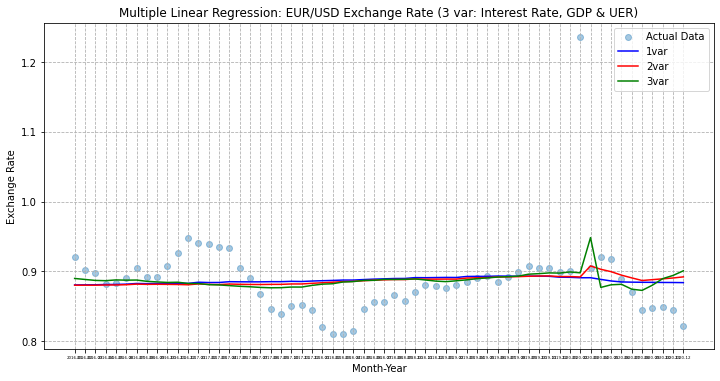

In [21]:
plt.figure(figsize=(12,6))
plt.scatter(month_year, y_fx, alpha=0.4)
plt.plot(month_year, y_fx_predict, color='b')
plt.plot(month_year, y_fx_predict_2, color='r')
plt.plot(month_year, y_fx_predict_3, color='g')
plt.legend(["Actual Data",'1var', '2var', '3var'])
plt.title("Multiple Linear Regression: EUR/USD Exchange Rate (3 var: Interest Rate, GDP & UER)")
plt.xlabel("Month-Year")
plt.ylabel("Exchange Rate")
plt.xticks(fontsize=4)
plt.grid(ls="--")
plt.show()

### Polynomial Regression

[0.92123016 0.90176443 0.89837056 0.88135745 0.88412979 0.89016443
 0.90448089 0.89193647 0.89233324 0.90808077 0.9275625  0.94783179
 0.94019399 0.93983752 0.9346862  0.92938    0.91281758 0.88796379
 0.86515936 0.84239046 0.84468844 0.85244515 0.85063401 0.8415026
 0.82304629 0.81078904 0.81170519 0.81441808 0.84300819 0.85682047
 0.85917811 0.86505703 0.85599505 0.87012699 0.88090416 0.87960369
 0.87578355 0.87966869 0.8858939  0.88923595 0.89489534 0.8849681
 0.89180071 0.89855241 0.90873423 0.90442203 0.90441589 0.89996785
 0.90114733 1.23524507 0.9049551  0.92044932 0.9185099  0.88861781
 0.87133341 0.84535363 0.84839531 0.84945472 0.84486334 0.82174993]

R-squared for Polynomial model with the same varibles: 0.9989982488531104


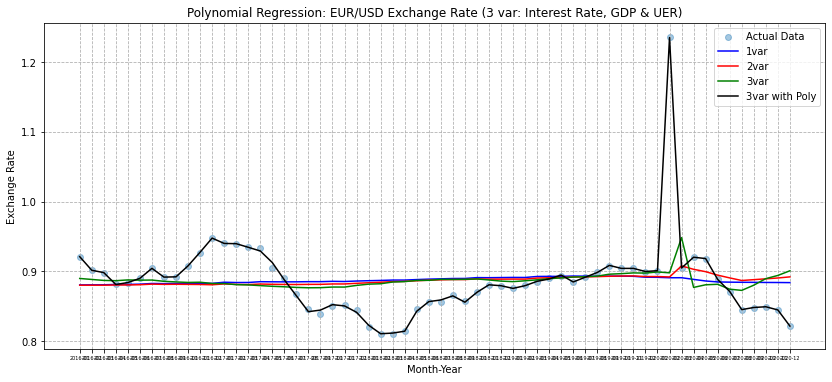

In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# PolynomialFeatures(degree=3)
poly = PolynomialFeatures(degree=5)

x_poly = poly.fit_transform(x_ir_gdp_uer)

model_poly = LinearRegression()
model_poly.fit(x_poly, y_fx)
y_pred = model_poly.predict(x_poly)
print(y_pred)
print()
print("R-squared for Polynomial model with the same varibles:", model_poly.score(x_poly, y_fx))

plt.figure(figsize=(14,6))
plt.scatter(month_year, y_fx, alpha=0.4)
plt.plot(month_year, y_fx_predict, color='b')
plt.plot(month_year, y_fx_predict_2, color='r')
plt.plot(month_year, y_fx_predict_3, color='g')
plt.plot(month_year, y_pred, color='black')
plt.legend(["Actual Data", '1var', '2var', '3var', '3var with Poly'])
plt.title("Polynomial Regression: EUR/USD Exchange Rate (3 var: Interest Rate, GDP & UER)")
plt.xlabel("Month-Year")
plt.ylabel("Exchange Rate")
plt.xticks(fontsize=5)
plt.grid(ls="--")
plt.show()

In [23]:
# Converting the predicted data into array
y_pred_df = np.array(y_pred).reshape(-1,1)
y_pred_df

array([[0.92123016],
       [0.90176443],
       [0.89837056],
       [0.88135745],
       [0.88412979],
       [0.89016443],
       [0.90448089],
       [0.89193647],
       [0.89233324],
       [0.90808077],
       [0.9275625 ],
       [0.94783179],
       [0.94019399],
       [0.93983752],
       [0.9346862 ],
       [0.92938   ],
       [0.91281758],
       [0.88796379],
       [0.86515936],
       [0.84239046],
       [0.84468844],
       [0.85244515],
       [0.85063401],
       [0.8415026 ],
       [0.82304629],
       [0.81078904],
       [0.81170519],
       [0.81441808],
       [0.84300819],
       [0.85682047],
       [0.85917811],
       [0.86505703],
       [0.85599505],
       [0.87012699],
       [0.88090416],
       [0.87960369],
       [0.87578355],
       [0.87966869],
       [0.8858939 ],
       [0.88923595],
       [0.89489534],
       [0.8849681 ],
       [0.89180071],
       [0.89855241],
       [0.90873423],
       [0.90442203],
       [0.90441589],
       [0.899

In [24]:
# Creating a time-series data with the predicted values
index_values = ['2016-01','2016-02','2016-03','2016-04','2016-05','2016-06','2016-06','2016-08','2016-09','2016-10','2016-11','2016-12',
               '2017-01','2017-02','2017-03','2017-04','2017-05','2017-06','2017-07','2017-08','2017-09','2017-10','2017-11','2017-12',
               '2018-01','2018-02','2018-03','2018-04','2018-05','2018-06','2018-07','2018-08','2018-09','2018-10','2018-11','2018-12',
               '2019-01','2019-02','2019-03','2019-04','2019-05','2019-06','2019-07','2019-08','2019-09','2019-10','2019-11','2019-12',
               '2020-01','2020-02','2020-03','2020-04','2020-05','2020-06','2020-07','2020-08','2020-09','2020-10','2020-11','2020-12']
column_values = ['Rates']
y_df = pd.DataFrame(data=y_pred_df, index=index_values, columns=column_values)
y_df

,Rates
2016-01,0.921230
2016-02,0.901764
2016-03,0.898371
2016-04,0.881357
2016-05,0.884130
2016-06,0.890164
2016-06,0.904481
2016-08,0.891936
2016-09,0.892333
2016-10,0.908081


In [25]:
# Changing the index column as a new Column
y_df['month_year']=y_df.index
y_df_2 = y_df.reset_index()
y_df_2 = y_df_2.drop(['index'], axis=1)
y_df_2

new_cols = ['month_year', 'Rates']
y_df_2 = y_df_2[new_cols]
y_df_2

,month_year,Rates
0,2016-01,0.921230
1,2016-02,0.901764
2,2016-03,0.898371
3,2016-04,0.881357
4,2016-05,0.884130
5,2016-06,0.890164
6,2016-06,0.904481
7,2016-08,0.891936
8,2016-09,0.892333
9,2016-10,0.908081


In [26]:
# Extractinng the dataframe to excel file
file_name = 'EURPred_20162020.xlsx'
  
# saving the excel
y_df_2.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


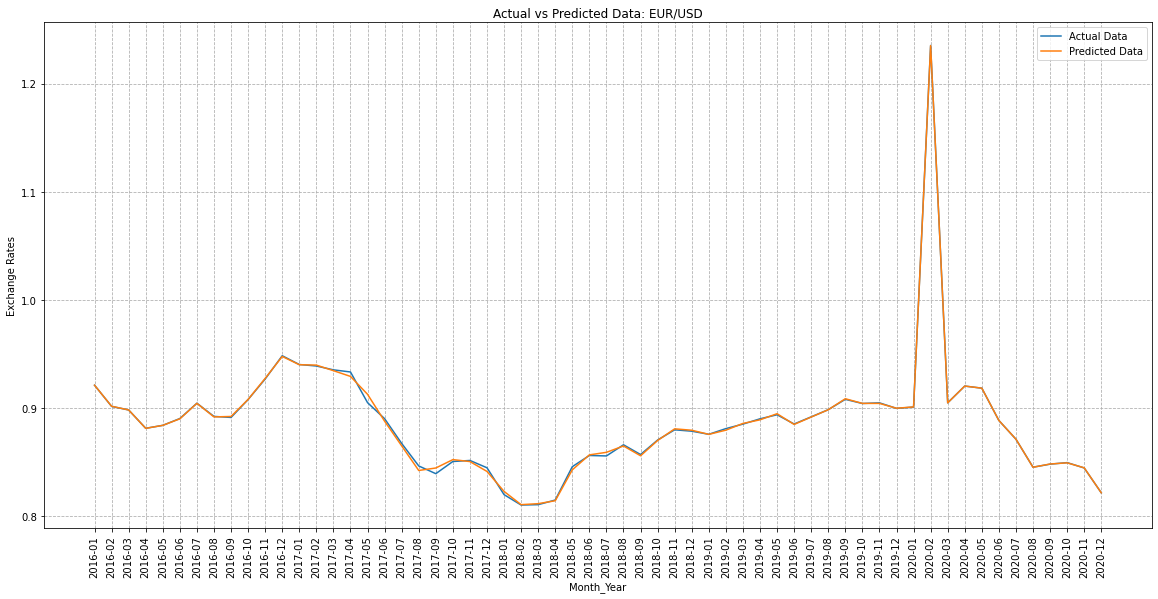

In [27]:
# to visualize the pattern of AUD/USD
x = eur_usd_fx['month_year'].astype(str)
y = eur_usd_fx['EUR_USD']

plt.figure(figsize=(16,8))
plt.plot(x, y, label='Actual Data')
plt.plot(x, y_df['Rates'], label='Predicted Data')
plt.tick_params(axis='x',rotation=90)
plt.tight_layout()
plt.title("Actual vs Predicted Data: EUR/USD")
plt.xlabel("Month_Year")
plt.ylabel("Exchange Rates")
plt.legend()
plt.grid(ls='--')
plt.show()

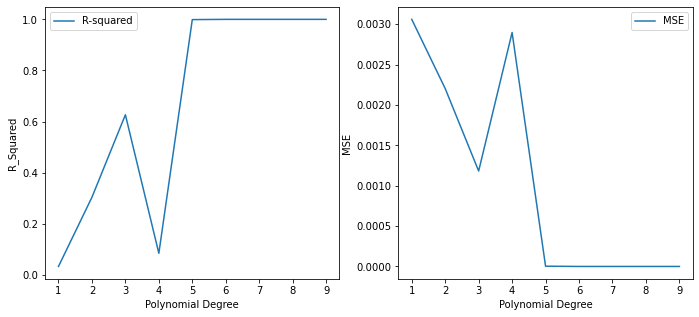

In [28]:
r_squared_list = []
mse_list = []
a = range(1,10,1)

for i in a:
    poly = PolynomialFeatures(degree=i)
    x_poly = poly.fit_transform(x_ir_gdp_uer)
    
    model_poly = LinearRegression()
    model_poly.fit(x_poly, y_fx)
    y_pred = model_poly.predict(x_poly)
    
    r_squared = model_poly.score(x_poly, y_fx)
    mse = mean_squared_error(y_pred, y_fx)
    
    r_squared_list.append(r_squared)
    mse_list.append(mse)

plt.figure(figsize=(10,5))
ax1 = plt.subplot(1,2,1)
plt.plot(a, r_squared_list, label="R-squared")
plt.xlabel("Polynomial Degree")
plt.ylabel("R_Squared")
plt.legend()
ax2 = plt.subplot(1,2,2)
plt.plot(a, mse_list, label="MSE")
plt.xlabel("Polynomial Degree")
plt.ylabel("MSE")
plt.legend()

plt.subplots_adjust(0.0005)

plt.show()

### Ridge Regression and Lasso Regression

In [29]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=0.001)
ridge.fit(x_ir_gdp_uer, y_fx)

y_fx_ridge = ridge.predict(x_ir_gdp_uer)
print("Ridge Regression score:", ridge.score(x_ir_gdp_uer, y_fx))

lasso = Lasso(alpha=0.001)
lasso.fit(x_ir_gdp_uer, y_fx)

y_fx_lasso = lasso.predict(x_ir_gdp_uer)
print("Lasso Regression Score:", lasso.score(x_ir_gdp_uer, y_fx))

Ridge Regression score: 0.03344906550545834
Lasso Regression Score: 0.032225251359198404


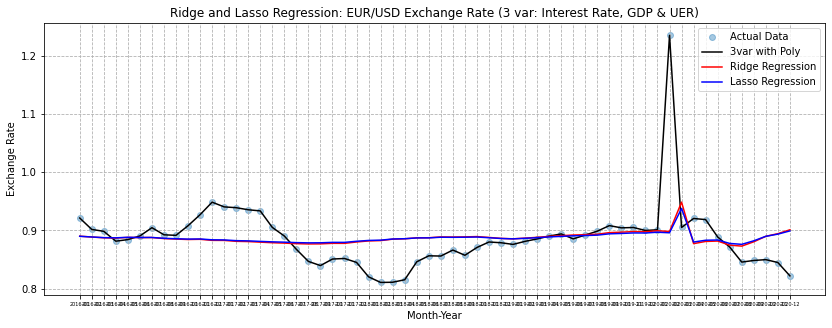

In [38]:
# Visualizing Ridge and Lasso Regression
plt.figure(figsize=(14,5))
plt.scatter(month_year, y_fx, alpha=0.4)
plt.plot(month_year, y_pred, color='black')
plt.plot(month_year, y_fx_ridge, color='r')
plt.plot(month_year, y_fx_lasso, color='b')
plt.legend(['Actual Data','3var with Poly', 'Ridge Regression', 'Lasso Regression'])
plt.title("Ridge and Lasso Regression: EUR/USD Exchange Rate (3 var: Interest Rate, GDP & UER)")
plt.xlabel("Month-Year")
plt.ylabel("Exchange Rate")
plt.xticks(fontsize=5)
plt.grid(ls="--")
plt.show()

#### Accuracy 2016

In [31]:
def forecast_accuracy(forecast, actual):
    
    mape = np.mean(np.abs(forecast-actual)/np.abs(actual)) #MAPE
    me = np.mean(forecast-actual) #ME
    mae = np.mean(np.abs(forecast-actual)) #MAE
    mpe = np.mean((forecast-actual)/actual) #MPE
    rmse = np.mean((forecast-actual)**2)**.5 #RMSE
    corr = np.corrcoef(forecast, actual)[0,1] #corr
    mins = np.amin(np.hstack([forecast[:,None], actual[:,None]]),axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)   # minmax
    accuracy = (1-mape)*100
    return ({'mape':mape, 'me':me, 'mae':mae, 'mpe':mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax, 'Overall accuracy':accuracy})

In [32]:
#Filtering actual data
eur_usd_fx2016 = df_groupby_eur[(df_groupby_eur['month_year'] >= '2016-01') & (df_groupby_eur['month_year'] <= '2016-12')].reset_index(drop=True)
eur_usd = eur_usd_fx2016['EUR_USD']

# filtering predicted data
predicted_data2016 = y_df_2[(y_df_2['month_year'] >= '2016-01') & (y_df_2['month_year'] <= '2016-12')].reset_index(drop=True)
predicted_rates = predicted_data2016['Rates']

actual2016 = np.array(eur_usd_fx2016['EUR_USD'])
print("---Actual 2016 Exchange Rates---")
print(actual2016)

print()

predicted2016 = np.array(predicted_rates)
print("---Predicted 2016 Exchange Rates---")
print(predicted2016)

# Calculating accuracy
accuracy = forecast_accuracy(predicted2016, actual2016)
accuracy_data2016 = pd.DataFrame.from_dict(accuracy, orient='index', columns={'2016'})
accuracy_data2016

---Actual 2016 Exchange Rates---
[0.92125263 0.90166    0.89833478 0.88140476 0.88412381 0.89041818
 0.904595   0.89238261 0.89144286 0.907995   0.92698    0.94848571]

---Predicted 2016 Exchange Rates---
[0.92123016 0.90176443 0.89837056 0.88135745 0.88412979 0.89016443
 0.90448089 0.89193647 0.89233324 0.90808077 0.9275625  0.94783179]


,2016
mape,0.000297
me,0.000014
mae,0.000270
mpe,0.000017
rmse,0.000394
corr,0.999788
minmax,0.000297
Overall accuracy,99.970311


#### Accuracy 2017

In [33]:
#Filtering actual data
eur_usd_fx2017 = df_groupby_eur[(df_groupby_eur['month_year'] >= '2017-01') & (df_groupby_eur['month_year'] <= '2017-12')].reset_index(drop=True)
eur_usd = eur_usd_fx2017['EUR_USD']

# filtering predicted data
predicted_data2017 = y_df_2[(y_df_2['month_year'] >= '2017-01') & (y_df_2['month_year'] <= '2017-12')].reset_index(drop=True)
predicted_rates = predicted_data2017['Rates']

actual2017 = np.array(eur_usd_fx2017['EUR_USD'])
print("---Actual 2017 Exchange Rates---")
print(actual2017)

print()

predicted2017 = np.array(predicted_rates)
print("---Predicted 2017 Exchange Rates---")
print(predicted2017)

# Calculating accuracy
accuracy = forecast_accuracy(predicted2017, actual2017)
accuracy_data2017 = pd.DataFrame.from_dict(accuracy, orient='index', columns={'2017'})
accuracy_data2017

---Actual 2017 Exchange Rates---
[0.94037895 0.93900526 0.93544348 0.933475   0.90511818 0.89028182
 0.867405   0.84658261 0.83944    0.8507     0.851655   0.8449    ]

---Predicted 2017 Exchange Rates---
[0.94019399 0.93983752 0.9346862  0.92938    0.91281758 0.88796379
 0.86515936 0.84239046 0.84468844 0.85244515 0.85063401 0.8415026 ]


,2017
mape,0.003204
me,-0.000224
mae,0.002811
mpe,-0.000255
rmse,0.003518
corr,0.996141
minmax,0.003195
Overall accuracy,99.679550


#### Accuracy 2018

In [34]:
#Filtering actual data
eur_usd_fx2018 = df_groupby_eur[(df_groupby_eur['month_year'] >= '2018-01') & (df_groupby_eur['month_year'] <= '2018-12')].reset_index(drop=True)
eur_usd = eur_usd_fx2018['EUR_USD']

# filtering predicted data
predicted_data2018 = y_df_2[(y_df_2['month_year'] >= '2018-01') & (y_df_2['month_year'] <= '2018-12')].reset_index(drop=True)
predicted_rates = predicted_data2018['Rates']

actual2018 = np.array(eur_usd_fx2018['EUR_USD'])
print("---Actual 2018 Exchange Rates---")
print(actual2018)

print()

predicted2018 = np.array(predicted_rates)
print("---Predicted 2018 Exchange Rates---")
print(predicted2018)

# Calculating accuracy
accuracy = forecast_accuracy(predicted2018, actual2018)
accuracy_data2018 = pd.DataFrame.from_dict(accuracy, orient='index', columns={'2018'})
accuracy_data2018

---Actual 2018 Exchange Rates---
[0.8200619  0.81043684 0.81078182 0.81507143 0.84592727 0.8562619
 0.8558381  0.86614783 0.85715263 0.87055455 0.880005   0.87871667]

---Predicted 2018 Exchange Rates---
[0.82304629 0.81078904 0.81170519 0.81441808 0.84300819 0.85682047
 0.85917811 0.86505703 0.85599505 0.87012699 0.88090416 0.87960369]


,2018
mape,0.001596
me,0.000308
mae,0.001349
mpe,0.000370
rmse,0.001698
corr,0.997822
minmax,0.001593
Overall accuracy,99.840399


#### Accuracy 2019

In [35]:
#Filtering actual data
eur_usd_fx2019 = df_groupby_eur[(df_groupby_eur['month_year'] >= '2019-01') & (df_groupby_eur['month_year'] <= '2019-12')].reset_index(drop=True)
eur_usd = eur_usd_fx2019['EUR_USD']

# filtering predicted data
predicted_data2019 = y_df_2[(y_df_2['month_year'] >= '2019-01') & (y_df_2['month_year'] <= '2019-12')].reset_index(drop=True)
predicted_rates = predicted_data2019['Rates']

actual2019 = np.array(eur_usd_fx2019['EUR_USD'])
print("---Actual 2019 Exchange Rates---")
print(actual2019)

print()

predicted2019 = np.array(predicted_rates)
print("---Predicted 2019 Exchange Rates---")
print(predicted2019)

# Calculating accuracy
accuracy = forecast_accuracy(predicted2019, actual2019)
accuracy_data2019 = pd.DataFrame.from_dict(accuracy, orient='index', columns={'2019'})
accuracy_data2019

---Actual 2019 Exchange Rates---
[0.87585    0.88111667 0.88527143 0.89016818 0.89390909 0.88537
 0.89196818 0.89860455 0.908175   0.90434091 0.90493684 0.8998    ]

---Predicted 2019 Exchange Rates---
[0.87578355 0.87966869 0.8858939  0.88923595 0.89489534 0.8849681
 0.89180071 0.89855241 0.90873423 0.90442203 0.90441589 0.89996785]


,2019
mape,0.000562
me,-0.000098
mae,0.000501
mpe,-0.000112
rmse,0.000655
corr,0.998119
minmax,0.000562
Overall accuracy,99.943831


#### Accuracy 2020

In [36]:
#Filtering actual data
eur_usd_fx2020 = df_groupby_eur[(df_groupby_eur['month_year'] >= '2020-01') & (df_groupby_eur['month_year'] <= '2020-12')].reset_index(drop=True)
eur_usd = eur_usd_fx2020['EUR_USD']

# filtering predicted data
predicted_data2020 = y_df_2[(y_df_2['month_year'] >= '2020-01') & (y_df_2['month_year'] <= '2020-12')].reset_index(drop=True)
predicted_rates = predicted_data2020['Rates']

actual2020 = np.array(eur_usd_fx2020['EUR_USD'])
print("---Actual 2020 Exchange Rates---")
print(actual2020)

print()

predicted2020 = np.array(predicted_rates)
print("---Predicted 2020 Exchange Rates---")
print(predicted2020)

# Calculating accuracy
accuracy = forecast_accuracy(predicted2020, actual2020)
accuracy_data2020 = pd.DataFrame.from_dict(accuracy, orient='index', columns={'2020'})
accuracy_data2020

---Actual 2020 Exchange Rates---
[0.90101818 1.23538421 0.90495455 0.92045    0.91850556 0.88863636
 0.87128636 0.84544737 0.848225   0.84967619 0.84472    0.82177619]

---Predicted 2020 Exchange Rates---
[0.90114733 1.23524507 0.9049551  0.92044932 0.9185099  0.88861781
 0.87133341 0.84535363 0.84839531 0.84945472 0.84486334 0.82174993]


,2020
mape,9.257313e-05
me,-4.253455e-07
mae,8.288210e-05
mpe,2.950972e-06
rmse,1.105633e-04
corr,9.999995e-01
minmax,9.256542e-05
Overall accuracy,9.999074e+01


In [37]:
accu2016 = accuracy_data2016['2016'].values[7]
accu2017 = accuracy_data2017['2017'].values[7]
accu2018 = accuracy_data2018['2018'].values[7]
accu2019 = accuracy_data2019['2019'].values[7]
accu2020 = accuracy_data2020['2020'].values[7]

y_axis = [accu2016, accu2017, accu2018, accu2019, accu2020]
x_axis = ['2016', '2017', '2018', '2019', '2020']

accu_df = pd.DataFrame({"Years":x_axis, "Overall Accuracy":y_axis})
accu_df

,Years,Overall Accuracy
0,2016,99.970311
1,2017,99.679550
2,2018,99.840399
3,2019,99.943831
4,2020,99.990743
